# Повторяющийся кусок инициализации

In [1]:
import datetime as dt

import mplfinance as mpf
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

# from pandas.plotting import register_matplotlib_converters

# register_matplotlib_converters()

In [22]:
# import MetaTrader5 as mt5
# # выведем данные о пакете MetaTrader5
# print("MetaTrader5 package author: ",mt5.__author__)
# print("MetaTrader5 package version: ",mt5.__version__)
# ticker = 'RIH2'
# if not mt5.initialize():
#     print("initialize() failed, error code =",mt5.last_error())
#     quit()
# # print(mt5.account_info())
# mt5.last_error()

MetaTrader5 package author:  MetaQuotes Ltd.
MetaTrader5 package version:  5.0.36


(1, 'Success')

# Отработка на полученной инфе с мт5 на фьюче на РТС

### Сама ф-ция для выстраивания структур

In [2]:
def get_eurusd_and_preprocess(func_):
    eurusd = pd.read_csv('data/HistoricalPrices.csv',parse_dates=[0])
    eurusd.columns = ['date', 'open', 'high', 'low', 'close']
#     eurusd.info()
    eurusd = eurusd.iloc[::-1]
    eurusd = func_(eurusd)
    eurusd = eurusd.set_index('date',drop=True)
    return eurusd

def plot(df,apdict,figscale=3,type='candle',style='default'):
    mpf.plot(df,type=type,addplot=apdict,figscale=figscale,style=style)
    
def date_cut(df,start_date,end_date):
    return df[start_date:end_date]

# Работаем здесь

"Структура" - это формация из свечек, в которой есть свеча которую рассчитываем (сегодня), свеча образующая структуру (n - (длина диапазона + 1)) и свечи между (0 - (1 ... n)).
Структура определяется образующей свечой, вслед за которой n свечей между не доходят и не превосходят границы (теней) образующей цены.

0

,low,3_min,7_min,3_max,base_structure_min_raw,base_structure_max_raw,base_structure_min,base_structure_max,local_structure_min_raw,local_structure_max_raw,local_structure_min,local_structure_max
date,,,,,,,,,,,,
2021-01-01,1.2126,1.2208,1.2160,1.2310,1.2208,1.2221,1.2208,1.2221,1.2160,1.2176,1.2160,1.2176
2021-01-04,1.2230,1.2126,1.2126,1.2310,1.2208,1.2221,1.2208,1.2221,1.2160,1.2176,1.2160,1.2176
2021-01-05,1.2247,1.2126,1.2126,1.2310,1.2208,1.2221,1.2208,1.2221,1.2160,1.2176,1.2160,1.2176
2021-01-06,1.2268,1.2126,1.2126,1.2308,1.2208,1.2308,1.2208,1.2308,1.2160,1.2176,1.2160,1.2176
2021-01-07,1.2245,1.2230,1.2126,1.2350,1.2230,1.2308,1.2230,1.2308,1.2160,1.2176,1.2160,1.2176
2021-01-08,1.2193,1.2245,1.2126,1.2350,1.2245,1.2308,1.2245,1.2308,1.2160,1.2176,1.2160,1.2176
2021-01-11,1.2133,1.2193,1.2126,1.2350,1.2245,1.2308,1.2245,1.2308,1.2160,1.2176,1.2160,1.2176
2021-01-12,1.2139,1.2133,1.2126,1.2346,1.2245,1.2346,1.2245,1.2346,1.2160,1.2176,1.2160,1.2176
2021-01-13,1.2141,1.2133,1.2133,1.2284,1.2245,1.2284,1.2245,1.2284,1.2133,1.2176,1.2133,1.2176


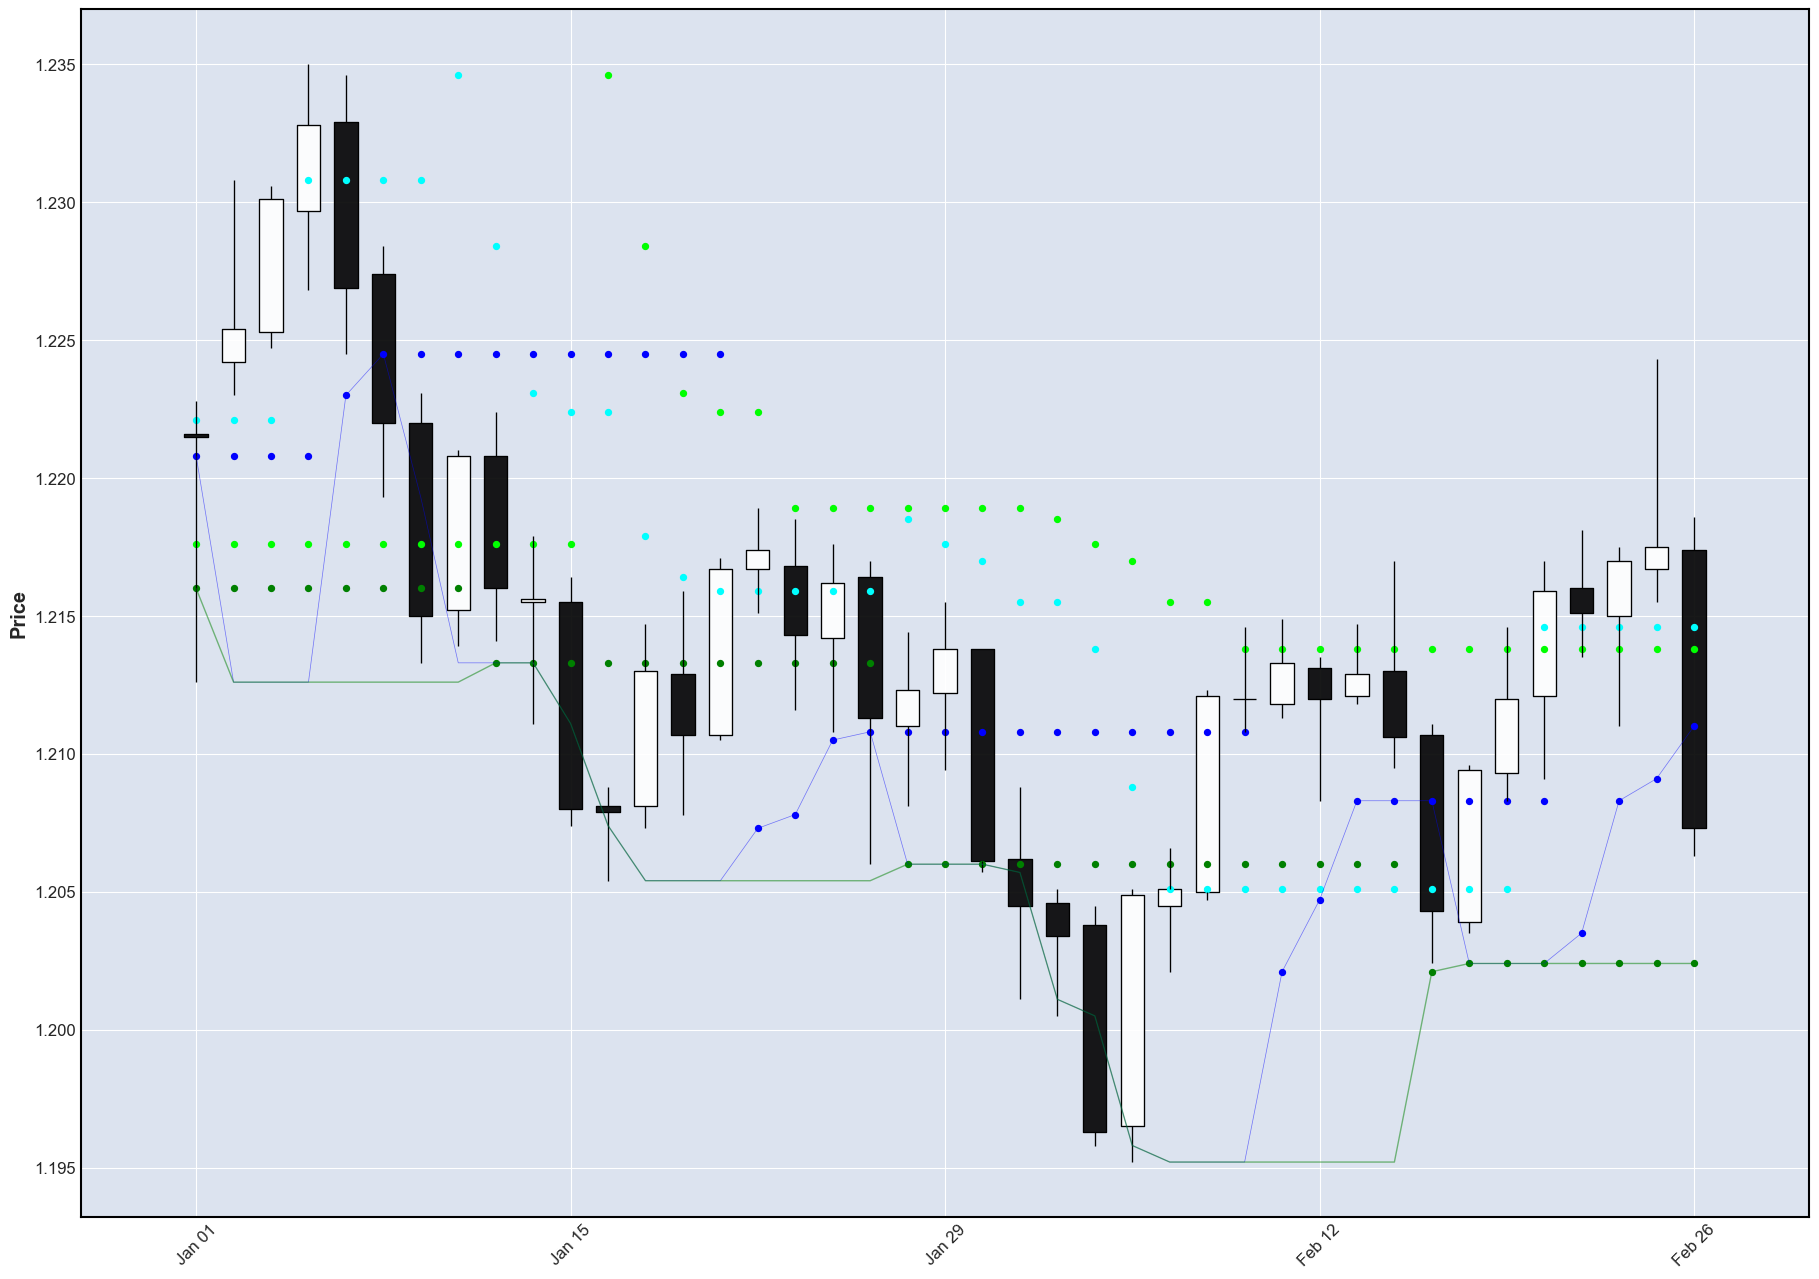

In [3]:
# ---------------------------
# ------------VER. 0.3-------
# ---------------------------
def struct_proto(df):
    df.copy()
    
    df['3_min'] = df['low'].rolling(3).min().shift(1)
    df['7_min'] = df['low'].rolling(7).min().shift(1)
    df['21_min'] = df['low'].rolling(21).min().shift(1)
    df['63_min'] = df['low'].rolling(63).min().shift(1)
    
    df['3_max'] = df['high'].rolling(3).max().shift(1)
    df['7_max'] = df['high'].rolling(7).max().shift(1)
    df['21_max'] = df['high'].rolling(21).max().shift(1)
    df['63_max'] = df['high'].rolling(63).max().shift(1)
    

    df['base_structure_min_raw'] = np.where((df['low'].shift(4) < df['3_min']),df['3_min'],np.nan)
    df['base_structure_min_raw'] = df['base_structure_min_raw'].fillna(method='ffill')
    
    df['base_structure_max_raw'] = np.where((df['high'].shift(4) > df['3_max']),df['3_max'],np.nan)
    df['base_structure_max_raw'] = df['base_structure_max_raw'].fillna(method='ffill')

    df['base_structure_min'] = df['base_structure_min_raw']
    df['base_structure_max'] = df['base_structure_max_raw']
    
    df['local_structure_min_raw'] = np.where((df['low'].shift(8) < df['7_min']),df['7_min'],np.nan)
    df['local_structure_min_raw'] = df['local_structure_min_raw'].fillna(method='ffill')
    
    df['local_structure_max_raw'] = np.where((df['high'].shift(8) > df['7_max']),df['7_max'],np.nan)
    df['local_structure_max_raw'] = df['local_structure_max_raw'].fillna(method='ffill')   
    
    df['local_structure_min'] = df['local_structure_min_raw']
    df['local_structure_max'] = df['local_structure_max_raw']
    
# Тут работаем <<<<<<<<<<<<<<<<<
# ----------------------------------------
# ------------------------------
#     И нужно сделать 2 правила:
#     1. Если нижняя базовая структура "проторгована", 
#     т.е. она строилась по предыдущим значениям, 
#     а не в результате того началась/образовалась базовая структура по этой свечке
#     и второе условие: эта проторгованная базовая структура оказалась
#     выше верхней базовой структуры - 
#     то она не должна отрисовываться, т.е. там должны быть пропуски
#     df['base_structure_min'] = np.where(((df['base_structure_min_raw'] > df['base_structure_max_raw'])
#                                          &~(df['low'].shift(4) < df['3_min'])),
#                                         np.nan,
#                                         df['base_structure_min_raw'])
#     И наоборот:
#     2. Если верхняя структура ниже верхней, то верхняя не должна отрисовываться, т.е. там должен быть пропуск
#     df['base_structure_max'] = df['base_structure_max_raw']
 

    
    
    
    
# Base min
#     ОНО РАБОТАЕТ КАК НАДО
    
#     Здесь мы находим/начинаем нижнюю базовую структуру.
#     Если минимум 4-ой свечки 
#     (счет идет с конца, т.е. 4,3,2,1,0, 0 - это текущая свечка, по которой расчитываем)
#     ниже минимумов 3,2,1, то структура в этой рассчитываемой свечке есть.
# 
#     base_init = df['low'].shift(4) < df['3_min']

#    Если структура в рассчитываемой свечке есть, то обозначаем ее, как минимум последних трех дней
#    т.е. минимальный минимум 3,2,1 свечей. (Рассчитываем по 0 свечке)
#    Если структуры нет, то оставляем пропуск

#     df['base_structure_min_first'] = np.where(base_init,df['3_min'],np.nan) # GOOD! 
    
#     Дальше нам необходимо сделать так, чтобы вместо пропусков было последнее значение структуры
#     т.е. вообразим, что смотрим на свечки 5,4,3,2,1,0
#         543210
#         543210
#         543210
#         54 210
#         5   1
#     Для 0 не существует нижней базовой структуры, потому что какой-то из минимумов 3,2,1 свечек (минимум 1-ой свечки)
#     Ниже минимума 4 свечи
#     Но для свечки номер 1 - нижняя базовая структура существует,
#     Потому что минимумы 4,3,2 выше минимума 5 свечи
#     Нам нужно под свечкой 0, поставить ту же самую границу нижней базовой структуры, что была под 1.

#     Для этого нам нужно просто заполнить наны методом 'ffill' (заполняет пропуски последним значением)

#     df['base_structure_min'] = df['base_structure_min_first'].fillna(method='ffill')

#     Можно это записать в одну 2 строки:
#     df['base_structure_min_raw'] = np.where((df['low'].shift(4) < df['3_min']),df['3_min'],np.nan)
#     df['base_structure_min_raw'] = df['base_structure_min_raw'].fillna(method='ffill')

#     Дальше мы строим такую же структуру с противоположной стороны
#     df['base_structure_max_raw'] = np.where((df['high'].shift(4) > df['3_max']),df['3_max'],np.nan)
#     df['base_structure_max_raw'] = df['base_structure_max_raw'].fillna(method='ffill')


    return df

eurusd = get_eurusd_and_preprocess(func_=struct_proto)

start_date = '2021-01-01'
end_date = '2021-02-28'

# start_date = '2021-01-02'
# end_date = '2021-01-31'

# start_date = '2021-01-25'
# end_date = '2021-01-29'


eurusd = date_cut(eurusd,start_date=start_date,end_date=end_date)
cols = ['high','low','63_min','widescale_structure_max','price<wsmax','grouper','glob_min']
# eurusd[cols]
display(
        eurusd.drop(columns=['open','close','63_min','63_max','7_max','21_max','high','21_min'])
        )

alpha_1 = 0.5
alpha_2 = 1
alpha_3 = 1

ms_1 = 1
ms_2 = 2
ms_3 = 0.4



apdict = [
#           mpf.make_addplot(eurusd['63_max'],type='line',width=3*ms_1,alpha=alpha_1,color="red"),
#           mpf.make_addplot(eurusd['21_max'],type='line',width=2*ms_1,alpha=alpha_1,color="yellow"),
#           mpf.make_addplot(eurusd['7_max'],type='line',width=1*ms_1,alpha=alpha_1,color="green"),
#           mpf.make_addplot(eurusd['3_max'],type='line',width=.5*ms_1,alpha=alpha_1,color="blue"),
          mpf.make_addplot(eurusd['3_min'],type='line',width=.5*ms_1,alpha=alpha_1,color="blue"),
          mpf.make_addplot(eurusd['7_min'],type='line',width=1*ms_1,alpha=alpha_1,color="green"),
#           mpf.make_addplot(eurusd['21_min'],type='line',width=2*ms_1,alpha=alpha_1,color="yellow"),
#           mpf.make_addplot(eurusd['63_min'],type='line',width=3*ms_1,alpha=alpha_1,color="red"),
    
#           mpf.make_addplot(eurusd['global_structure_max'],type='line',width=3*ms_2,alpha=alpha_2,color="orange"),
#           mpf.make_addplot(eurusd['widescale_structure_max'],type='line',width=2*ms_2,alpha=alpha_2,color="yellow"),
          mpf.make_addplot(eurusd['local_structure_max'],type='scatter',width=1*ms_2,alpha=alpha_2,color="lime"),
          mpf.make_addplot(eurusd['base_structure_max'],type='scatter',width=0.5*ms_2,alpha=alpha_2,color="aqua"),
          mpf.make_addplot(eurusd['base_structure_min'],type='scatter',width=0.5*ms_2,alpha=alpha_2,color="blue"),
          mpf.make_addplot(eurusd['local_structure_min'],type='scatter',width=1*ms_2,alpha=alpha_2,color="green"),
#           mpf.make_addplot(eurusd['widescale_structure_min'],type='line',width=2*ms_2,alpha=alpha_2,color="yellow"),
#           mpf.make_addplot(eurusd['global_structure_min'],type='line',width=3*ms_2,alpha=alpha_2,color="orange"),
    
#           mpf.make_addplot(eurusd['h>=3max'],type='line',width=3*ms_3,alpha=alpha_3,color="blue"),
#           mpf.make_addplot(eurusd['l<=3min'],type='line',width=3*ms_3,alpha=alpha_3,color="blue"),
#           mpf.make_addplot(eurusd['l<=7min'],type='line',width=3*ms_3,alpha=alpha_3,color="green"),
#           mpf.make_addplot(eurusd['3min_3daysmax'],type='line',width=3*ms_3,alpha=alpha_3,color="black"),
            ]


plot(eurusd,
     apdict=apdict,
     figscale=3,
     type='candle',
     style='default')

,low,3_min,7_min,3_max,base_structure_min_first,base_structure_min
date,,,,,,
2021-01-01,1.2126,1.2208,1.2160,1.2310,1.2208,1.2208
2021-01-04,1.2230,1.2126,1.2126,1.2310,NaN,1.2208
2021-01-05,1.2247,1.2126,1.2126,1.2310,NaN,1.2208
2021-01-06,1.2268,1.2126,1.2126,1.2308,NaN,1.2208
2021-01-07,1.2245,1.2230,1.2126,1.2350,1.2230,1.2230
2021-01-08,1.2193,1.2245,1.2126,1.2350,1.2245,1.2245
2021-01-11,1.2133,1.2193,1.2126,1.2350,NaN,1.2245
2021-01-12,1.2139,1.2133,1.2126,1.2346,NaN,1.2245
2021-01-13,1.2141,1.2133,1.2133,1.2284,NaN,1.2245


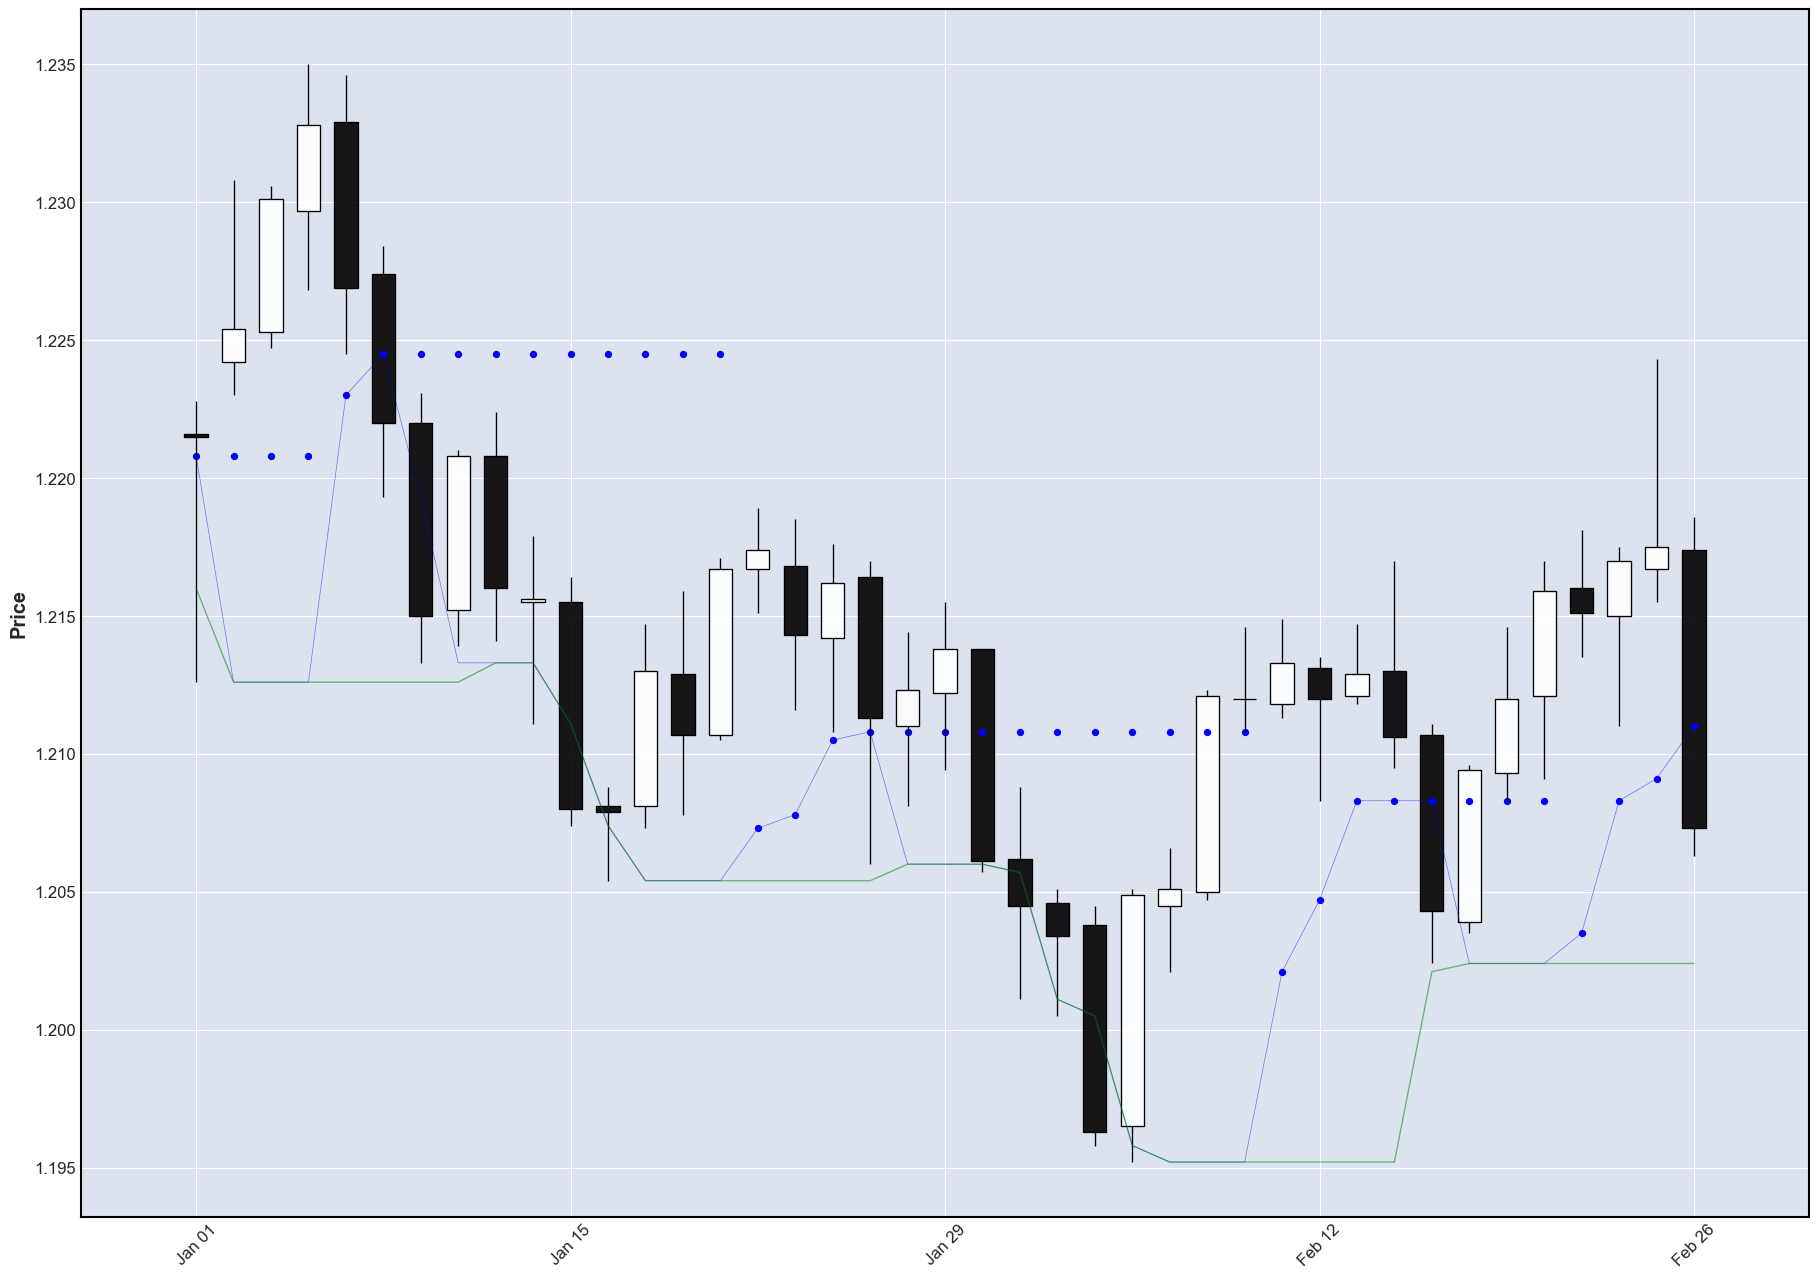

In [59]:
# ---------------------------
# ------------VER. 0.2-------
# ---------------------------
def struct_proto(df):
    df.copy()
    
    df['3_min'] = df['low'].rolling(3).min().shift(1)
    df['7_min'] = df['low'].rolling(7).min().shift(1)
    df['21_min'] = df['low'].rolling(21).min().shift(1)
    df['63_min'] = df['low'].rolling(63).min().shift(1)
    
    df['3_max'] = df['high'].rolling(3).max().shift(1)
    df['7_max'] = df['high'].rolling(7).max().shift(1)
    df['21_max'] = df['high'].rolling(21).max().shift(1)
    df['63_max'] = df['high'].rolling(63).max().shift(1)
    
# Base min
#     ОНО РАБОТАЕТ КАК НАДО
    
#     Здесь мы находим/начинаем нижнюю базовую структуру.
#     Если минимум 4-ой свечки 
#     (счет идет с конца, т.е. 4,3,2,1,0, 0 - это текущая свечка, по которой расчитываем)
#     ниже минимумов 3,2,1, то структура в этой рассчитываемой свечке есть.
# 
    base_init = df['low'].shift(4) < df['3_min']

#    Если структура в рассчитываемой свечке есть, то обозначаем ее, как минимум последних трех дней
#    т.е. минимальный минимум 3,2,1 свечей. (Рассчитываем по 0 свечке)
#    Если структуры нет, то оставляем пропуск
    df['base_structure_min_first'] = np.where(base_init,df['3_min'],np.nan) # GOOD! 
    
#     Дальше нам необходимо сделать так, чтобы вместо пропусков было последнее значение структуры
#     т.е. вообразим, что смотрим на свечки 5,4,3,2,1,0
#         543210
#         543210
#         543210
#         54 210
#         5   1
#     Для 0 не существует нижней базовой структуры, потому что какой-то из минимумов 3,2,1 свечек (минимум 1-ой свечки)
#     Ниже минимума 4 свечи
#     Но для свечки номер 1 - нижняя базовая структура существует,
#     Потому что минимумы 4,3,2 выше минимума 5 свечи
#     Нам нужно под свечкой 0, поставить ту же самую границу нижней базовой структуры, что была под 1.

#     Для этого нам нужно просто заполнить наны методом 'ffill' (заполняет пропуски последним значением)

    df['base_structure_min'] = df['base_structure_min_first'].fillna(method='ffill')

#     ОНО РАБОТАЕТ КАК НАДО

    return df

eurusd = get_eurusd_and_preprocess(func_=struct_proto)

start_date = '2021-01-01'
end_date = '2021-02-28'

# start_date = '2021-01-02'
# end_date = '2021-01-31'

# start_date = '2021-01-25'
# end_date = '2021-01-29'


eurusd = date_cut(eurusd,start_date=start_date,end_date=end_date)
cols = ['high','low','63_min','widescale_structure_max','price<wsmax','grouper','glob_min']
# eurusd[cols]
display(
        eurusd.drop(columns=['open','close','63_min','63_max','7_max','21_max','high','21_min'])
        )

alpha_1 = 0.5
alpha_2 = 1
alpha_3 = 1

ms_1 = 1
ms_2 = 2
ms_3 = 0.4



apdict = [
#           mpf.make_addplot(eurusd['63_max'],type='line',width=3*ms_1,alpha=alpha_1,color="red"),
#           mpf.make_addplot(eurusd['21_max'],type='line',width=2*ms_1,alpha=alpha_1,color="yellow"),
#           mpf.make_addplot(eurusd['7_max'],type='line',width=1*ms_1,alpha=alpha_1,color="green"),
#           mpf.make_addplot(eurusd['3_max'],type='line',width=.5*ms_1,alpha=alpha_1,color="blue"),
          mpf.make_addplot(eurusd['3_min'],type='line',width=.5*ms_1,alpha=alpha_1,color="blue"),
          mpf.make_addplot(eurusd['7_min'],type='line',width=1*ms_1,alpha=alpha_1,color="green"),
#           mpf.make_addplot(eurusd['21_min'],type='line',width=2*ms_1,alpha=alpha_1,color="yellow"),
#           mpf.make_addplot(eurusd['63_min'],type='line',width=3*ms_1,alpha=alpha_1,color="red"),
    
#           mpf.make_addplot(eurusd['global_structure_max'],type='line',width=3*ms_2,alpha=alpha_2,color="orange"),
#           mpf.make_addplot(eurusd['widescale_structure_max'],type='line',width=2*ms_2,alpha=alpha_2,color="yellow"),
#           mpf.make_addplot(eurusd['local_structure_max'],type='line',width=1*ms_2,alpha=alpha_2,color="green"),
#           mpf.make_addplot(eurusd['base_structure_max'],type='line',width=0.5*ms_2,alpha=alpha_2,color="blue"),
          mpf.make_addplot(eurusd['base_structure_min'],type='scatter',width=0.5*ms_2,alpha=alpha_2,color="blue"),
#           mpf.make_addplot(eurusd['local_structure_min'],type='line',width=1*ms_2,alpha=alpha_2,color="green"),
#           mpf.make_addplot(eurusd['widescale_structure_min'],type='line',width=2*ms_2,alpha=alpha_2,color="yellow"),
#           mpf.make_addplot(eurusd['global_structure_min'],type='line',width=3*ms_2,alpha=alpha_2,color="orange"),
    
#           mpf.make_addplot(eurusd['h>=3max'],type='line',width=3*ms_3,alpha=alpha_3,color="blue"),
#           mpf.make_addplot(eurusd['l<=3min'],type='line',width=3*ms_3,alpha=alpha_3,color="blue"),
#           mpf.make_addplot(eurusd['l<=7min'],type='line',width=3*ms_3,alpha=alpha_3,color="green"),
#           mpf.make_addplot(eurusd['3min_3daysmax'],type='line',width=3*ms_3,alpha=alpha_3,color="black"),
            ]


plot(eurusd,
     apdict=apdict,
     figscale=3,
     type='candle',
     style='default')

In [ ]:
# ---------------------------
# ------------VER. 0.1-------
# ---------------------------
def struct_proto(df):
    df.copy()
    
    df['3_min'] = df['low'].rolling(3).min().shift(1)
    df['7_min'] = df['low'].rolling(7).min().shift(1)
    df['21_min'] = df['low'].rolling(21).min().shift(1)
    df['63_min'] = df['low'].rolling(63).min().shift(1)
    
    df['3_max'] = df['high'].rolling(3).max().shift(1)
    df['7_max'] = df['high'].rolling(7).max().shift(1)
    df['21_max'] = df['high'].rolling(21).max().shift(1)
    df['63_max'] = df['high'].rolling(63).max().shift(1)
    
# Base min
#     ОНО РАБОТАЕТ КАК НАДО
    
    base_init = df['low'].shift(4) < df['3_min']
    
    df['base_structure_min_first'] = np.where(base_init,df['3_min'],np.nan) # GOOD! 
    grouper = (base_init != base_init.shift()).cumsum()
    df['grouper'] = grouper
    df['grouper_result'] = df.groupby(grouper).transform('last')['base_structure_min_first'].shift(1)
    df['base_init'] = base_init
    df['is_na'] = df['base_structure_min_first'].isna()
    df['grouper_2'] = df.groupby(grouper).transform('first')['grouper_result']
    df['base_structure_min'] = np.where(base_init, df['base_structure_min_first'],df['grouper_2'])
#     ОНО РАБОТАЕТ КАК НАДО

    return df

eurusd = get_eurusd_and_preprocess(func_=struct_proto)

start_date = '2021-01-01'
end_date = '2021-02-28'

# start_date = '2021-01-02'
# end_date = '2021-01-31'

# start_date = '2021-01-25'
# end_date = '2021-01-29'


eurusd = date_cut(eurusd,start_date=start_date,end_date=end_date)
cols = ['high','low','63_min','widescale_structure_max','price<wsmax','grouper','glob_min']
# eurusd[cols]
display(
        eurusd.drop(columns=['open','close','63_min','63_max','7_max','21_max','high','21_min'])
        )

alpha_1 = 0.5
alpha_2 = 1
alpha_3 = 1

ms_1 = 1
ms_2 = 2
ms_3 = 0.4



apdict = [
#           mpf.make_addplot(eurusd['63_max'],type='line',width=3*ms_1,alpha=alpha_1,color="red"),
#           mpf.make_addplot(eurusd['21_max'],type='line',width=2*ms_1,alpha=alpha_1,color="yellow"),
#           mpf.make_addplot(eurusd['7_max'],type='line',width=1*ms_1,alpha=alpha_1,color="green"),
#           mpf.make_addplot(eurusd['3_max'],type='line',width=.5*ms_1,alpha=alpha_1,color="blue"),
          mpf.make_addplot(eurusd['3_min'],type='line',width=.5*ms_1,alpha=alpha_1,color="blue"),
          mpf.make_addplot(eurusd['7_min'],type='line',width=1*ms_1,alpha=alpha_1,color="green"),
#           mpf.make_addplot(eurusd['21_min'],type='line',width=2*ms_1,alpha=alpha_1,color="yellow"),
#           mpf.make_addplot(eurusd['63_min'],type='line',width=3*ms_1,alpha=alpha_1,color="red"),
    
#           mpf.make_addplot(eurusd['global_structure_max'],type='line',width=3*ms_2,alpha=alpha_2,color="orange"),
#           mpf.make_addplot(eurusd['widescale_structure_max'],type='line',width=2*ms_2,alpha=alpha_2,color="yellow"),
#           mpf.make_addplot(eurusd['local_structure_max'],type='line',width=1*ms_2,alpha=alpha_2,color="green"),
#           mpf.make_addplot(eurusd['base_structure_max'],type='line',width=0.5*ms_2,alpha=alpha_2,color="blue"),
          mpf.make_addplot(eurusd['base_structure_min'],type='scatter',width=0.5*ms_2,alpha=alpha_2,color="blue"),
#           mpf.make_addplot(eurusd['local_structure_min'],type='line',width=1*ms_2,alpha=alpha_2,color="green"),
#           mpf.make_addplot(eurusd['widescale_structure_min'],type='line',width=2*ms_2,alpha=alpha_2,color="yellow"),
#           mpf.make_addplot(eurusd['global_structure_min'],type='line',width=3*ms_2,alpha=alpha_2,color="orange"),
    
#           mpf.make_addplot(eurusd['h>=3max'],type='line',width=3*ms_3,alpha=alpha_3,color="blue"),
#           mpf.make_addplot(eurusd['l<=3min'],type='line',width=3*ms_3,alpha=alpha_3,color="blue"),
#           mpf.make_addplot(eurusd['l<=7min'],type='line',width=3*ms_3,alpha=alpha_3,color="green"),
#           mpf.make_addplot(eurusd['3min_3daysmax'],type='line',width=3*ms_3,alpha=alpha_3,color="black"),
            ]


plot(eurusd,
     apdict=apdict,
     figscale=3,
     type='candle',
     style='default')

,high,low,63_min,widescale_structure_max,price<wsmax,grouper,glob_min
date,,,,,,,
2021-01-01,1.2228,1.2126,1.1605,1.2310,1,327,1.1605
2021-01-04,1.2308,1.2230,1.1605,1.2310,1,327,1.1605
2021-01-05,1.2306,1.2247,1.1605,1.2310,1,327,1.1605
2021-01-06,1.2350,1.2268,1.1605,1.2310,0,328,1.1605
2021-01-07,1.2346,1.2245,1.1605,1.2350,1,329,1.1605
...,...,...,...,...,...,...,...
2021-12-27,1.1336,1.1302,1.1186,1.1383,1,343,1.1524
2021-12-28,1.1335,1.1289,1.1186,1.1383,1,343,1.1524
2021-12-29,1.1369,1.1275,1.1186,1.1383,1,343,1.1524


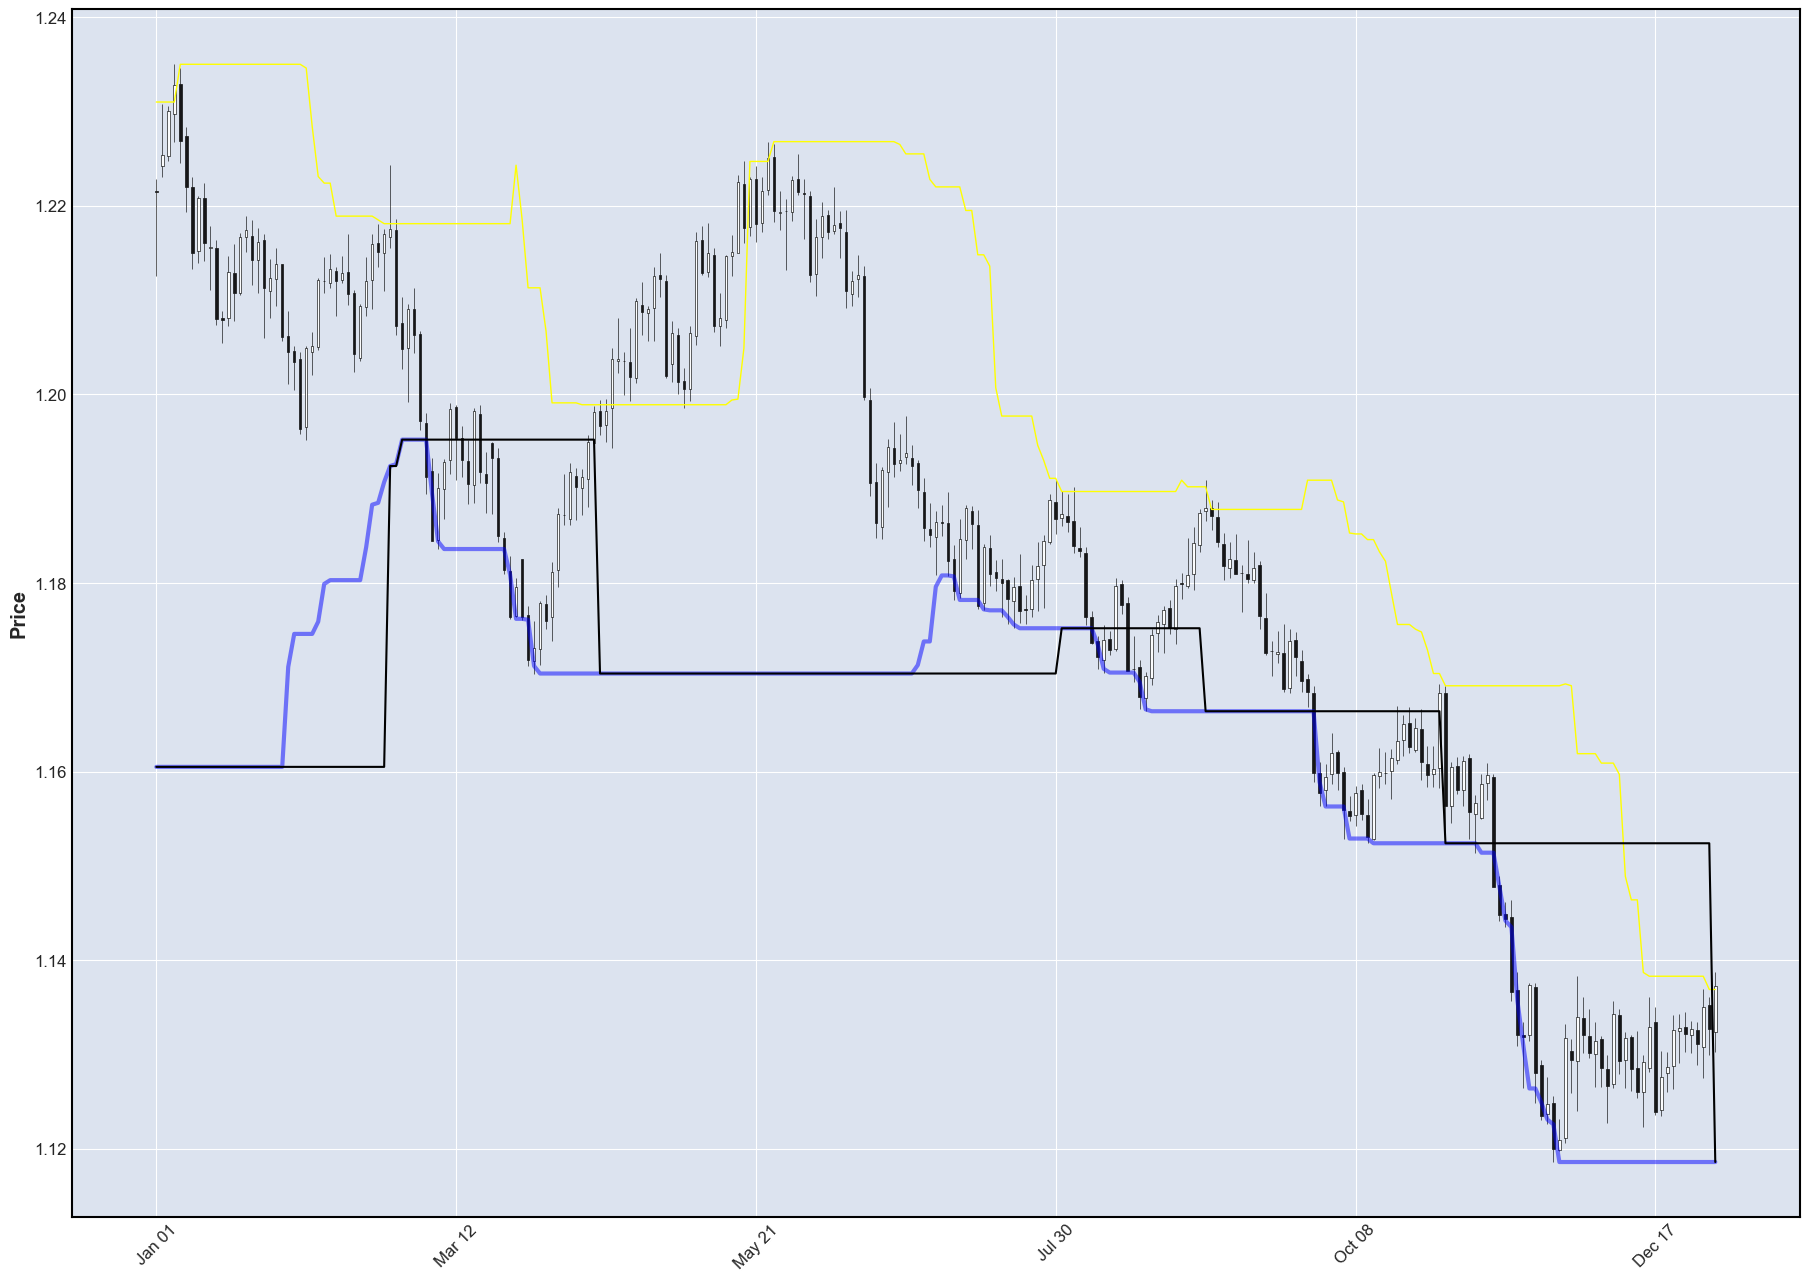

In [385]:
# ----------------
# Global min proto func 2
# VALID WORKING
# ----------------

def global_min_test(df):
    df = df.copy()


    df['63_min'] = df['low'].rolling(63).min().shift(1)

    df['21_max'] = df['high'].rolling(21).max().shift(1)
    df['63_max'] = df['high'].rolling(63).max().shift(1)
    
    rolling_21max = df['21_max'].rolling(21).min().shift(1)
    mask_21_max = (df['high']>df['21_max']).rolling(21).max() == 1
    r21max_eq_r63max = df['21_max'] != df['63_max']
    df['widescale_structure_max'] = np.where(((mask_21_max)&(r21max_eq_r63max)),
                                                rolling_21max,
                                                df['21_max'])

# #     ---------------
# #    Global structure min
# #     ---------------

    df['price<wsmax'] = np.where(df['high'] >= df['widescale_structure_max'],0,1)
    grouper = (df['price<wsmax'] != df['price<wsmax'].shift()).cumsum()
    df['grouper'] = grouper
    df['glob_min'] = df.groupby([grouper]).transform('first')['63_min']

    return df

eurusd = get_eurusd_and_preprocess(func_=global_min_test)

start_date = '2021-01-01'
end_date = '2021-12-31'
# -------------------------
# start_date = '2021-02-15'
# end_date = '2021-05-31'
# start_date = '2021-03-20'
# end_date = '2021-06-20'
# -------------------------
# start_date = '2021-01-01'
# end_date = '2021-02-28'

eurusd = date_cut(eurusd,start_date=start_date,end_date=end_date)
cols = ['high','low','63_min','widescale_structure_max','price<wsmax','grouper','glob_min']
display(eurusd[cols])


# ------------------
# ОТРИСОВКА
# ------------------
eurusd = get_eurusd_and_preprocess(func_=global_min_test)



eurusd = date_cut(eurusd,start_date=start_date,end_date=end_date)

alpha_1 = 0.5
alpha_2 = 1
alpha_3 = 1

ms_1 = 1
ms_2 = 0.5
ms_3 = 0.5



apdict = [
#           mpf.make_addplot(eurusd['63_max'],type='line',width=3*ms_1,alpha=alpha_1,color="red"),
#           mpf.make_addplot(eurusd['21_max'],type='line',width=2*ms_1,alpha=alpha_1,color="yellow"),
#           mpf.make_addplot(eurusd['7_max'],type='line',width=1*ms_1,alpha=alpha_1,color="green"),
#           mpf.make_addplot(eurusd['7_min'],type='line',width=1*ms_1,alpha=alpha_1,color="green"),
#           mpf.make_addplot(eurusd['21_min'],type='line',width=2*ms_1,alpha=alpha_1,color="yellow"),
          mpf.make_addplot(eurusd['63_min'],type='line',width=3*ms_1,alpha=alpha_1,color="blue"),
    
#           mpf.make_addplot(eurusd['global_structure_max'],type='line',width=3*ms_2,alpha=alpha_2,color="orange"),
          mpf.make_addplot(eurusd['widescale_structure_max'],type='line',width=2*ms_2,alpha=alpha_2,color="yellow"),
#           mpf.make_addplot(eurusd['base_structure_max'],type='line',width=1*ms_2,alpha=alpha_2,color="green"),
#           mpf.make_addplot(eurusd['base_structure_min'],type='line',width=1*ms_2,alpha=alpha_2,color="green"),
#           mpf.make_addplot(eurusd['widescale_structure_min'],type='line',width=2*ms_2,alpha=alpha_2,color="yellow"),
#           mpf.make_addplot(eurusd['global_structure_min'],type='line',width=3*ms_2,alpha=alpha_2,color="orange"),
    
#           mpf.make_addplot(eurusd['global_structure_max_after'],type='line',width=3*ms_3,alpha=alpha_3,color="red"),
#           mpf.make_addplot(eurusd['global_structure_min_after'],type='line',width=3*ms_3,alpha=alpha_3,color="red"),
          mpf.make_addplot(eurusd['glob_min'],type='line',width=3*ms_3,alpha=alpha_3,color="black"),
#           mpf.make_addplot(eurusd['test2'],type='line',width=3*ms_3,alpha=alpha_3,color="black"),

         ]


plot(eurusd,apdict=apdict,figscale=3)

# Проверяем на форекс инфе EURUSD

In [10]:


def get_and_plot(df=None,start_date=None,end_date=None,apdict=apdict,figscale=3):

        
    if start_date != None and end_date != None:
        df = date_cut(df,start_date=start_date,end_date=end_date)
    elif start_date != None or end_date != None:
        raise ValueError('Specify start_date AND end_date together')
    plot(df,apdict=apdict,figscale=figscale)

# start_date = '2021-01-01'
# end_date = '2021-12-31'    
# get_and_plot(df=eurusd,start_date=start_date,end_date=end_date)
# get_and_plot()

NameError: name 'apdict' is not defined

ValueError: x and y must have same first dimension, but have shapes (261,) and (4162,)

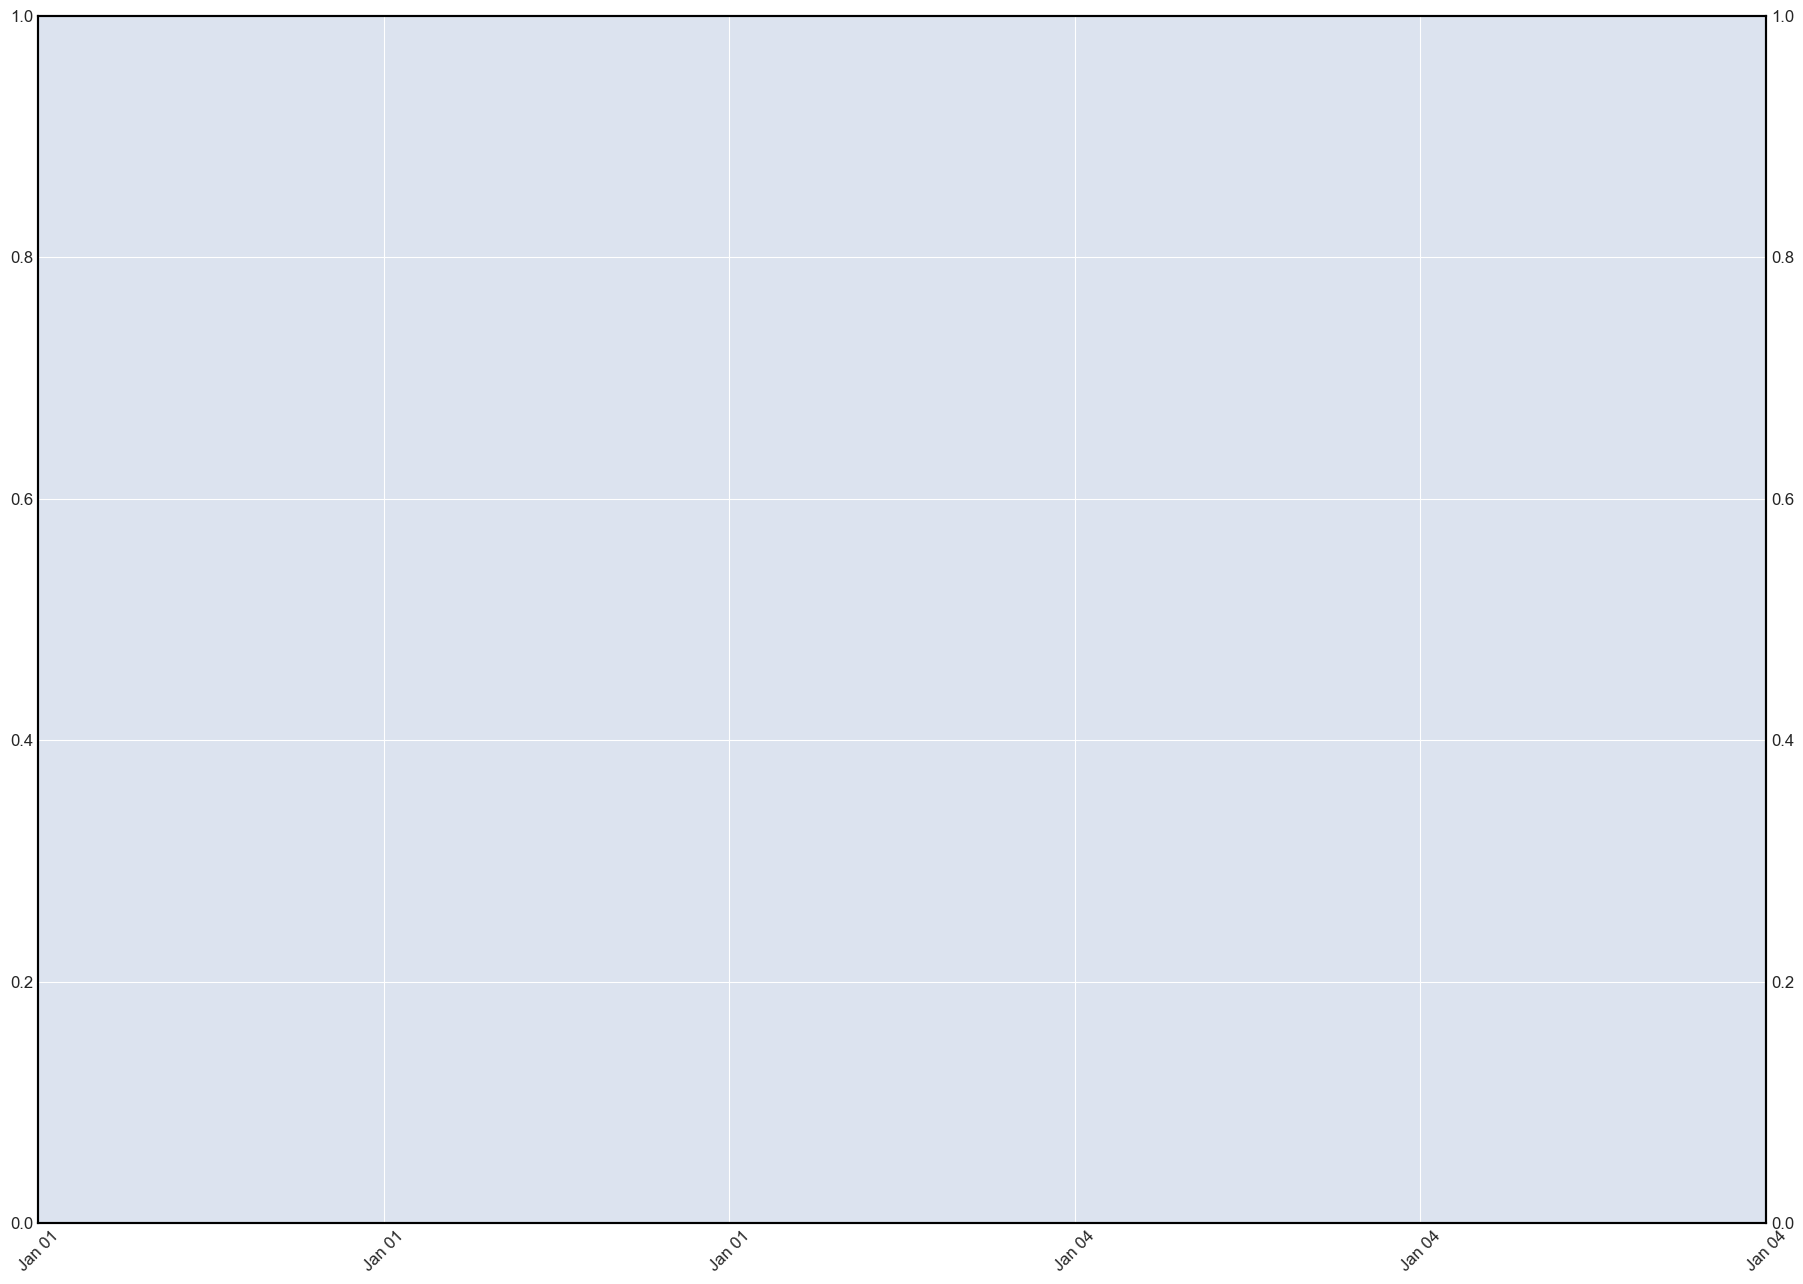

In [143]:
start_date = '2021-01-01'
end_date = '2021-12-31'
# temp_df = date_cut(temp_df,start_date,end_date)
temp_df = temp_df[start_date:end_date]

# apdict = [mpf.make_addplot(temp_df['base_structure_min'],type='line',markersize=1,color="green"),
# #           mpf.make_addplot(temp_df['21_min'],type='line',markersize=1,color="orange"),
#           mpf.make_addplot(temp_df['widescale_structure_min'],type='line',markersize=2,alpha=1,color="yellow"),
# #           mpf.make_addplot(temp_df['63_min'],type='line',markersize=1,color="blue"),
#           mpf.make_addplot(temp_df['global_structure_min'],type='line',markersize=3,color='red'),
#           mpf.make_addplot(temp_df['base_structure_max'],type='line',markersize=1,color="green"),
#           mpf.make_addplot(temp_df['widescale_structure_max'],type='line',markersize=2,color="yellow"),
# #           mpf.make_addplot(temp_df['63_max'],type='line',markersize=3,color='red'),
#           mpf.make_addplot(temp_df['global_structure_max'],type='line',markersize=3,color='red')
          
#          ]
mpf.plot(temp_df,type='candle',addplot=apdict,figscale=3)

# Шатдаун подключения

In [19]:
# завершим подключение к терминалу MetaTrader 5
# mt5.shutdown()

True

# Очень полезные штуки

In [317]:
# ----------------------------------------
# Очень крутой прием
# ----------------------------------------


def struct_dummie(df):
    df = df.copy()
    df['63_min'] = df['low'].rolling(63).min().shift(1)
    df['21_max'] = df['high'].rolling(21).max().shift(1)
    df['63_max'] = df['high'].rolling(63).max().shift(1)
    
    rolling_21max = df['21_max'].rolling(21).min().shift(1)
    mask_21_max = (df['high']>df['21_max']).rolling(21).max() == 1
    r21max_eq_r63max = df['21_max'] != df['63_max']
    df['widescale_structure_max'] = np.where(((mask_21_max)&(r21max_eq_r63max)),
                                                rolling_21max,
                                                df['21_max'])

    df['ws_max_touch'] = np.where(df['high'] >= df['widescale_structure_max'],1,0)
    return df

eurusd = get_eurusd_and_preprocess(func_=struct_dummie)

start_date = '2021-04-14'
end_date = '2021-06-20'

eurusd = date_cut(eurusd,start_date=start_date,end_date=end_date)
test = eurusd[['ws_max_touch','count_zeros']]


# https://stackoverflow.com/questions/29421356/pandas-cumulative-sum-on-column-with-condition

# Берем столбец с по сути булевыми значениями было ли касание цены верхней масштабной структуры
# Если было касание то 1, если не было то 0
# Но нам надо посчитать сколько прошло строк после последнего касания, т.е. считать сколько не было касаний подряд
# Поэтому меняем 1 на 0 и 0 на 1, чтобы проще было считать 1

# df['ws_max_touch'] = np.where(df['high'] >= df['widescale_structure_max'],1,0)

test['ws_max_touch'] = test['ws_max_touch'].replace({0:1,1:0})

# Здесь просто убираем пропуски
v = test['ws_max_touch'].dropna()
# display(v)

# Это группировщик. 
# Он понадобится для дальнейшего груп бай
# Он создает столбец с булевыми значениями, которые говорят равно ли предыдущее значение текущему
grouper_init = (v!=v.shift())


# А затем считает кумулятивную сумму того, что получилось
# Поскольку True это единица,
# То к кумулятивной сумме будет прибавляться единица, каждый раз
# Когда v!=v.shift(), т.е. когда текущее значение не равно предыдущему
# Т.е. давая начало новой группе.
# Получается 1 значение обязательно True - кумулятивная сумма 1 - обозначает первую группу
# Затем кумулятивная сумма остается равна 1 пока какое-то значение перестанет быть равно предыдущему
# там возникает True, а значит кумулятивная сумма увеличивается на 1 и становится равна 2
# Так же ровно до того момента пока какое-то значение перестанет быть равно предыдущему
# Так выстраиваются группы
grouper = (v!=v.shift()).cumsum()


display(pd.concat([grouper_init,grouper],axis=1).head())

test['grouper_init'] = grouper_init
test['grouper'] = grouper

# Затем используем этот группировщик в групбай искомого столбца и применяем cumsum()


test['another'] = test.groupby(grouper)['ws_max_touch'].cumsum()

test

C:\Users\SnakeRZR\AppData\Local\Temp/ipykernel_3220/36963162.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['ws_max_touch'] = test['ws_max_touch'].replace({0:1,1:0})


,ws_max_touch,ws_max_touch
date,,
2021-04-14,True,1
2021-04-15,True,2
2021-04-16,False,2
2021-04-19,False,2
2021-04-20,False,2


C:\Users\SnakeRZR\AppData\Local\Temp/ipykernel_3220/36963162.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['grouper_init'] = grouper_init
C:\Users\SnakeRZR\AppData\Local\Temp/ipykernel_3220/36963162.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['grouper'] = grouper
C:\Users\SnakeRZR\AppData\Local\Temp/ipykernel_3220/36963162.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

,ws_max_touch,count_zeros,another,grouper,grouper_init
date,,,,,
2021-04-14,1,33,1,1,True
2021-04-15,0,0,0,2,True
2021-04-16,0,0,0,2,False
2021-04-19,0,0,0,2,False
2021-04-20,0,0,0,2,False
2021-04-21,0,0,0,2,False
2021-04-22,0,0,0,2,False
2021-04-23,0,0,0,2,False
2021-04-26,0,0,0,2,False


# OLD

In [2]:
# ------------------
# Не работает??
# ------------------

# v.01
# ----------------------


def structure(df):
    df = df.copy()

    """
    Здесь сначала строим базовую и масштабную структуры сверху и снизу,
    а затем глобальные. Потому что глобальные определяются 
    через взаимодействие цены с масштабными структурами (противоположными)
    """
    
    
#     ---------------------------
#     Построение структур снизу
#     ---------------------------

#     Начальные вводные
#     Это по сути минимумы за предыдущие 7, 21 и 63 дня
    df['7_min'] = df['low'].rolling(7).min().shift(1)
    df['21_min'] = df['low'].rolling(21).min().shift(1)
    df['63_min'] = df['low'].rolling(63).min().shift(1)
    
    
    
#     ---------------
#     Base structure min
#     ---------------
#     Если цена уходит ниже 7-дневного минимума, но остается выше 21дневного минимума (или масштабной структуры?)
#     то не меняем уровень базовой структуры (не берем его из минимума 21 дня)
#     В противном случае - берем
# 
#     Чтобы не менять уровень базовой структуры мы точно также берез скользящий максимум за 7 дней
#     **ИЗ** минимума 7 дневного.

#     Скользящий максимум из 7-дневного минимума
    rolling_r7min = df['7_min'].rolling(7).max().shift(1)
#     Проверка, опускалась ли цена ниже 7-дневного минимума за последние 7 дней
    mask_7_min = (df['low']<df['7_min']).rolling(7).max() == 1
#     Еще одна проверка, которая работает, но я не до конца понимаю логику
#     Проверка, на не совпадение 7-дневный минимум с 21-дневным.
    r7min_eq_r21min = df['21_min'] != df['7_min']

#     Если за последние 7 дней хоть раз цена опускалась ниже базовой структруры и скользящий 7 мин не равен 21 мин,
# то точка базовой структуры является скользящая за 7 периодов скользящий 7дневный минимум
# в противном случае сам скользящий 7дневный минимум
    df['base_structure_min'] = np.where(((mask_7_min)&(r7min_eq_r21min)),
                                            rolling_r7min,
                                            df['7_min'])    
    

#     --------------------
#     Widescale structure min
#     --------------------
#     Если цена опускается ниже 21-дневного минимума, но остается выше уровня глобальной стуктуры (или выше минимума 63 дневного?),
#     то уровень масштабной структуры не меняем (не берем его из минимума 21 дня)
#     В противно случае - берем.
# 
#     Чтобы не менять уровень масштабной структуры - берем скользящий максимум за 21 день
#     **ИЗ** минимума 21 дня

#     Скользящий максимум 21 дня из 21-дневного минимума
    rolling_21min = df['21_min'].rolling(21).max().shift(1)
#     Проверка, опускалась ли цена ниже 21-дневного минимума за последние 21 день
    mask_21_min = (df['low']<df['21_min']).rolling(21).max() == 1
#     Проверка, 
#     Это что-то про диапазон периода?
#     <--- Обратить внимание, не ясно что тут и зачем. И что будет если изменить 63_min на global_structure_min
#     Здесь будем считать, что это ограничение по периоду, чтобы масштабная структура не длилась дольше 63 дней
#     Т.е. когда 21дневный минимум становится равен 63дневному, значит это структура стала как минимум глобальной
#     r21min_eq_r63min = True
    r21min_eq_r63min = df['21_min'] != df['63_min']
#     r21min_eq_r63min = df['21_min'] != df['global_structure_min']

#     Само условие: там где цена опустилась ниже 21-дн минимума за последние 21 день и 21-дн минимум совпал с 63-дн
#     мин, то возвращаем самое большое значение 21-дн минимума за последние 21 день.
#     В противном случае - просто 21-дн минимум.
    df['widescale_structure_min'] = np.where(((mask_21_min)&(r21min_eq_r63min)),
                                                rolling_21min,
                                                df['21_min'])
    
 

    
#     ----------НЕ НУЖНО----vvvv-------
#     Дополнительно, если базовая структура меньше или равна масштабной, 
#     то базовая структура не заходит ниже масштабной, т.е. конкретно точка
#     базовой структуры равна точне масштабной
#     df['base_structure'] = np.where((df['base_structure'] <= df['widescale_structure']),df['widescale_structure'],df['base_structure'])
#     ----------КОНЕЦ НЕ НУЖНО----^^^^^^-------

#     ---------------------------
#     Построение структур сверху
#     ---------------------------

#     Начальные вводные
#     Это по сути максимумы за предыдущие 7, 21 и 63 дня
    df['7_max'] = df['high'].rolling(7).max().shift(1)
    df['21_max'] = df['high'].rolling(21).max().shift(1)
    df['63_max'] = df['high'].rolling(63).max().shift(1)

#     ---------------
#     Base structure max
#     ---------------
#     Если цена уходит ВЫШЕ 7-дневного максимума, но остается ниже 21дн максимума 
#     то не меняем уровень базовой структуры (не берем его из максимума 21 дня)
#     В противном случае - берем
# 
#     Чтобы не менять уровень базовой структуры мы точно также берем скользящий минимум за 7 дней
#     **ИЗ** 7-дн максимума.

#     Скользящий минимум из 7-дневного максимума
    rolling_r7max = df['7_max'].rolling(7).min().shift(1)
#     Проверка, ПОДНИМАЛАСЬ ЛИ цена ВЫШЕ 7-дневного максимума за последние 7 дней
    mask_7_max = (df['high']<df['7_max']).rolling(7).max() == 1
#     Еще одна проверка, которая работает, но я не до конца понимаю логику
#     Проверка, на не совпадение 7-дневный максимума с 21-дневным.
    r7max_eq_r21max = df['21_max'] != df['7_max']

#     Если за последние 7 дней хоть раз цена ПОДНИМАЛАСЬ ВЫШЕ 7дн максимума и скользящий 7 макс не равен 21-дн,
#     то точка базовой структуры является минимум за последние 7 дней из 7-дн максимума
#     в противном случае сам 7-дн максимум
    df['base_structure_max'] = np.where(((mask_7_max)&(r7max_eq_r21max)),
                                            rolling_r7max,
                                            df['7_max'])
    

#     --------------------
#     Widescale structure max
#     --------------------
#     Если цена ПОДНИМАЕТСЯ ВЫШЕ 21-дневного максимума, но остается НИЖЕ максимума 63 дневного,
#     то уровень масштабной структуры не меняем (не берем его из максимума 21 дня).
#     В противном случае - берем.
# 
#     Чтобы не менять уровень масштабной структуры - берем скользящий минимум за 21 день
#     **ИЗ** 21-дн максимума

#     Скользящий минимум 21 дня из 21-дневного максимума
    rolling_21max = df['21_max'].rolling(21).min().shift(1)
#     Проверка, ПОДНИМАЛАСЬ ЛИ цена ВЫШЕ 21-дневного МАКСИМУМА за последние 21 день
    mask_21_max = (df['high']>df['21_max']).rolling(21).max() == 1
#     <--- Обратить внимание, не ясно что тут и зачем. И что будет если изменить 63_min на global_structure_min
#     Здесь будем считать, что это ограничение по периоду, чтобы масштабная структура не длилась дольше 63 дней
#     Т.е. когда 21дн максимум становится равен 63дн, значит это структура стала как минимум глобальной
#     r21min_eq_r63min = True
    r21max_eq_r63max = df['21_max'] != df['63_max']
#     r21min_eq_r63min = df['21_min'] != df['global_structure_min']

#     Само условие: там где цена поднилась выше 21-дн максимума за последние 21 день и 21-дн максимум совпал с 63-дн, 
#     то возвращаем самое маленькое значение 21-дн максимума за последние 21 день.
#     В противном случае - просто 21-дн максимум.
    df['widescale_structure_max'] = np.where(((mask_21_max)&(r21max_eq_r63max)),
                                                rolling_21max,
                                                df['21_max'])
    
#     ---------------
#    Построение глобальных структур
#     ---------------


#     ---------------
#    Global structure min
#     ---------------
#     Если цена опускается ниже минимума 63 дней хоть раз в течении 63 дней,
#     то уровень глобальной структуры не меняется (не берем его из минимума 63 дней),
#     В противном случае - берем.
# 
#     Чтобы не менять уровень глобальной стуктуры мы просто берем скользящий максимум из 63 дней
#     ***ИЗ*** минимума 63 дней.

#    rolling 63 of rolling_63_max shifted by 1
#     Скользящий максимум 63 из минимума 63
    rolling_63min = df['63_min'].rolling(63).max().shift(1) 
#     Маска для проверки опускалась ли цена ниже 63 минимума за поседние 63 дня
    mask_63_min = (df['low'] < df['63_min']).rolling(63).max() == 1
    


#     Проверка, коснулась ли цена верхней масштабной структуры
#     mask_high_wide_touch = (df['high'] == df['widescale_structure_max']).rolling(63).max() == 1
#     ws_max_touch = (df['high'] == df['widescale_structure_max']).rolling(21).max() == 0 # но за 21 день
    
#     Само условие, если цена опускалась ниже 63 минимума за последние 63 дня,
#     то возвращаем максимальное значение 63-дневнего минимума за последние 63 дня,
#     в противном случае возвращаем 63-дневный минимум
    df['global_structure_min'] = np.where(mask_63_min,rolling_63min,df['63_min'])
#     df['global_structure_min_before'] = np.where(mask_63_min,rolling_63min,df['63_min'])
    
  
    

#     ---------------
#    Global structure max
#     ---------------
#     Если цена ПОДНИМАЕТСЯ ВЫШЕ максимума 63 дней хоть раз в течении 63 дней,
#     то уровень глобальной структуры не меняется (не берем его из максимума 63 дней),
#     В противном случае - берем.
# 
#     Чтобы не менять уровень глобальной стуктуры мы просто берем скользящий МИНИМУМ из 63 дней
#     ***ИЗ*** МАКСИМУМА 63 дней.

#     Скользящий минимум 63 из 63-дн максимума
    rolling_63max = df['63_max'].rolling(63).min().shift(1) 
#     Маска для проверки ПОДНИМАЛАСЬ ли цена ВЫШЕ 63-дн маскимума за поседние 63 дня
    mask_63_max = (df['high'] > df['63_max']).rolling(63).max() == 1
    
#     ws_min_touch = (df['low'] == df['widescale_structure_min']).rolling(21).max() == 0
    
#     Само условие, если цена ПОДНИМАЛАСЬ ВЫШЕ 63-дн максимума за последние 63 дня,
#     то возвращаем МИНИМАЛЬНОЕ значение 63-дневнего максимума за последние 63 дня,
#     в противном случае возвращаем 63-дневный максимум
    df['global_structure_max'] = np.where(mask_63_max,rolling_63max,df['63_max'])
#     df['global_structure_max_before'] = np.where(mask_63_max,rolling_63max,df['63_max'])
    
    
    
# #     Пробуем варианты, чтобы когда цена касалась масштабной структуры, то 
# #     базовая определялась через 63дн мин.
# #     Плюс минус работает как ожидается, с помарками


    mask_h = (df['high'] >= df['widescale_structure_max']).rolling(21).max() == 0
    df['global_structure_min_after'] = np.where(mask_h,df['global_structure_min'],df['63_min']) 
    
    
    mask = (df['low'] <= df['widescale_structure_min']).rolling(21).max() == 0
    df['global_structure_max_after'] = np.where(mask,df['global_structure_max'],df['63_max'])

    return df

In [237]:
# ----------------
# Global min proto func 1
# ----------------

def struct(df):
    df = df.copy()


#     Начальные вводные
#     Это по сути минимумы за предыдущие 7, 21 и 63 дня
#     df['7_min'] = df['low'].rolling(7).min().shift(1)
#     df['21_min'] = df['low'].rolling(21).min().shift(1)
    df['63_min'] = df['low'].rolling(63).min().shift(1)


#     Начальные вводные
#     Это по сути максимумы за предыдущие 7, 21 и 63 дня
#     df['7_max'] = df['high'].rolling(7).max().shift(1)
    df['21_max'] = df['high'].rolling(21).max().shift(1)
    df['63_max'] = df['high'].rolling(63).max().shift(1)
    
    rolling_21max = df['21_max'].rolling(21).min().shift(1)
    mask_21_max = (df['high']>df['21_max']).rolling(21).max() == 1
    r21max_eq_r63max = df['21_max'] != df['63_max']
    df['widescale_structure_max'] = np.where(((mask_21_max)&(r21max_eq_r63max)),
                                                rolling_21max,
                                                df['21_max'])

#     ---------------
#    Global structure min
#     ---------------

    rolling_63min = df['63_min'].rolling(63).max().shift(1) 

    inside_global_last_63_days = (df['low'] < df['63_min']).rolling(63).max() == 1
    did_not_touched_ws_max_last_21_days = (df['high'] >= df['widescale_structure_max']).rolling(21).max() == 0

    df['global_structure_min'] = np.where(inside_global_last_63_days,rolling_63min,df['63_min'])
    df['global_structure_min_after'] = np.where(did_not_touched_ws_max_last_21_days,df['global_structure_min'],df['63_min']) 
    
#     df['global_structure_min_after'] = np.where((inside_global_last_63_days & did_not_touched_ws_max_last_21_days),
#                                                 rolling_63min,df['63_min'])

    
    
    ws_max_touch = df['high'] >= df['widescale_structure_max']
    df['ws_max_touch'] = ws_max_touch
    df['test1'] = np.where(ws_max_touch, 1.15,1.14)
    df['test2'] = np.where(df['low'] < df['63_min'], 1.13,1.12)
#     df['global_structure_min_after'] = np.where((inside_global_last_63_days & ~ws_max_touch),
#                                                 rolling_63min,df['63_min'])



#     Было касание? (бул)
    
#     Сколько дней прошло с момента касания цены ws_max?
#     days_count = 

#     df['global_structure_min_after'] = np.where((inside_global_last_63_days & did_not_touched_ws_max_last_21_days),
#                                                 rolling_63min,df['63_min'])

    return df

# Проверяем на RIH2

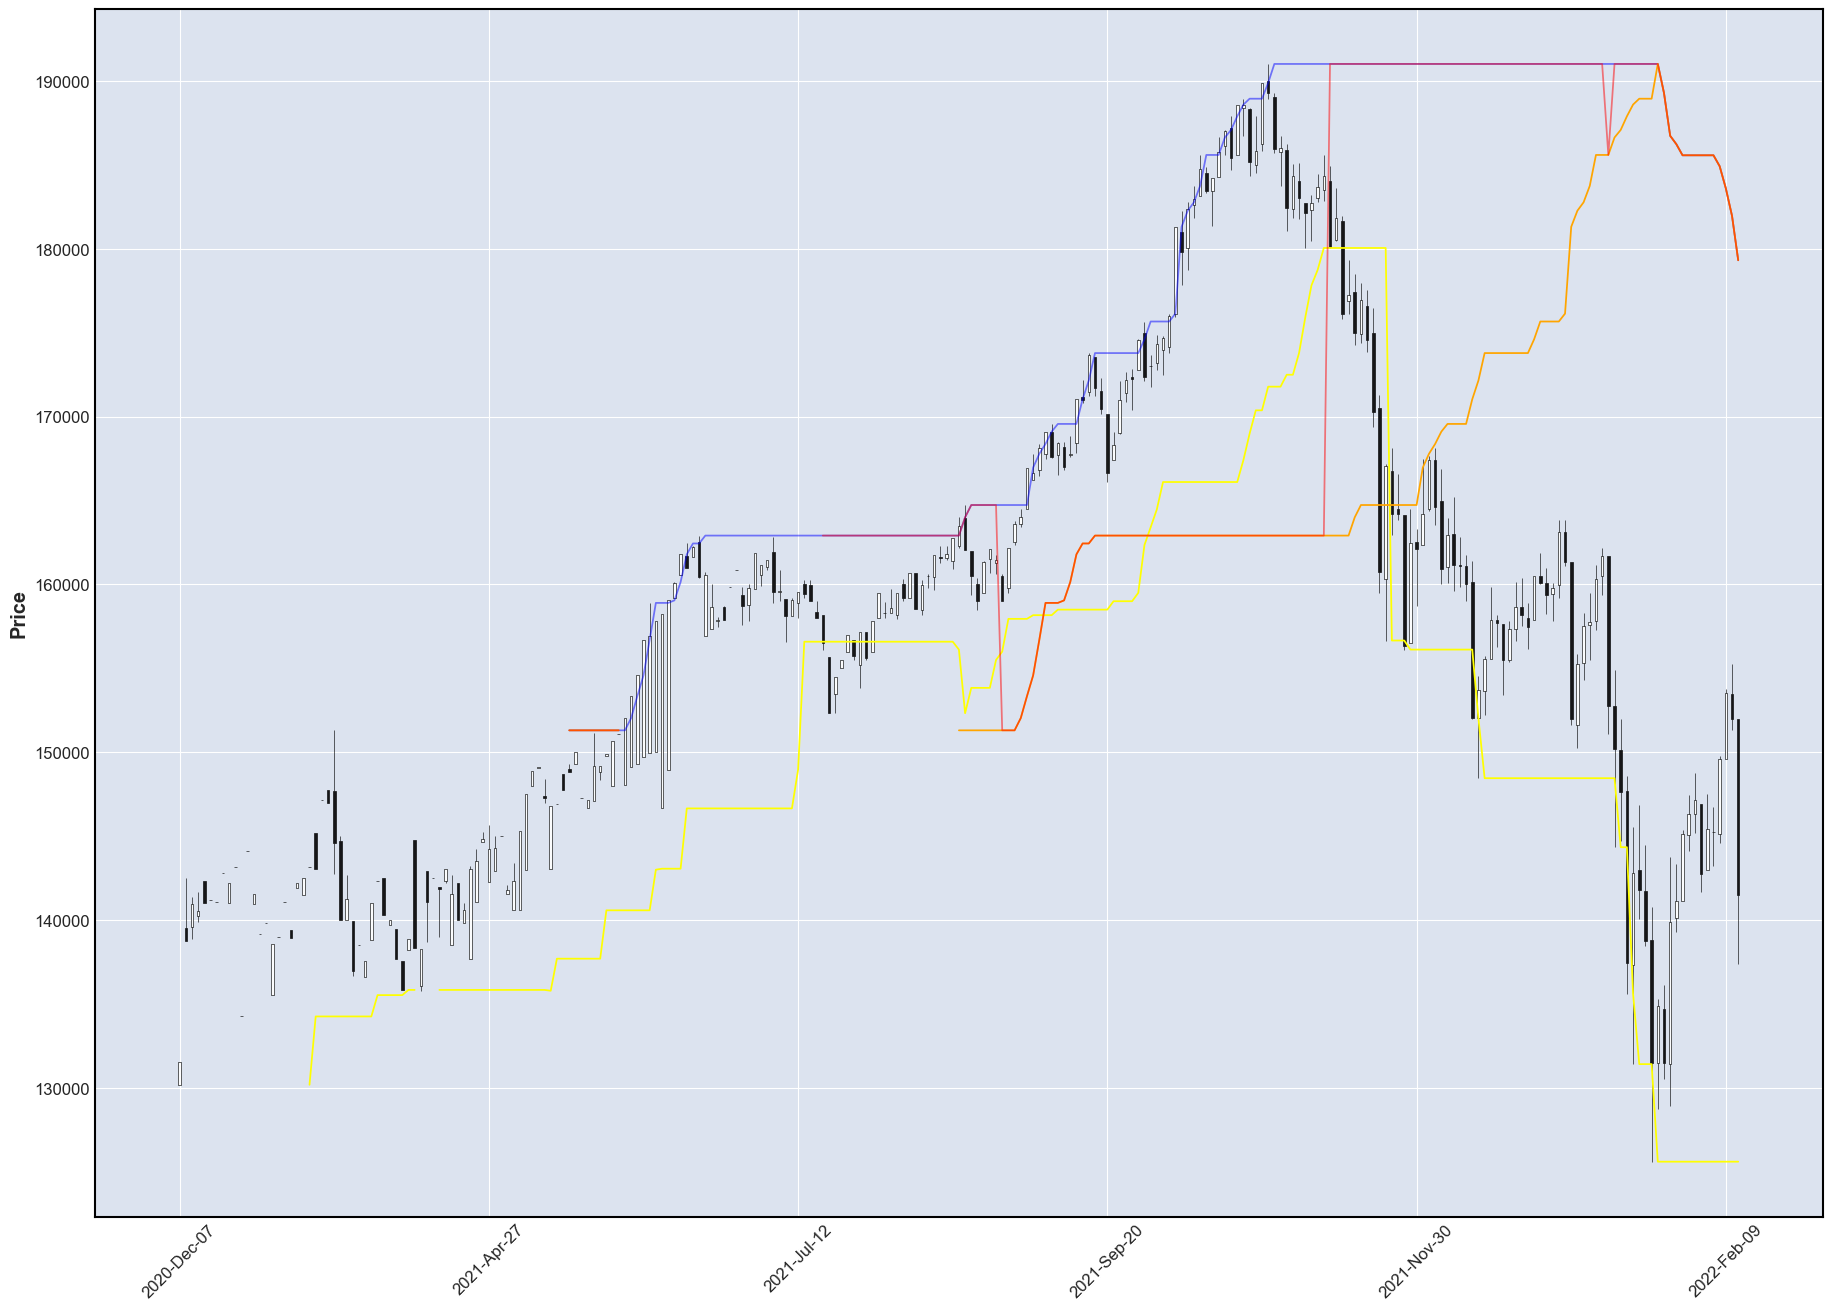

In [105]:
# Это код для тестов structure 
temp_df = get_candlesticks(symbol=ticker,timedelta=300)
temp_df = structure(temp_df)

# temp_df['global_structure_max'] = temp_df['global_structure_max'].fillna(temp_df['63_max'])

# start_date = '2021-10-01'
# end_date = '2021-12-31'

# start_date = '2021-12-01'
# end_date = '2022-01-31'
# temp_df = date_cut(temp_df,start_date,end_date)



# vls=['2022-01-13']
# two_points  = [[('2021-12-13',170000),('2022-01-13',170000)],
#                [('2021-10-13',160000),('2022-01-13',160000)]]

mpf.plot(temp_df.set_index('time',drop=True),type='candle',
         addplot=apdict,
#          vlines=dict(vlines=vls,colors='c'),
#          alines=two_points,
         figscale=3)

### Ф-ция для отрезания периода

In [3]:
def date_cut(df,start_date,end_date):
    mask = (df['time'] > start_date) & (df['time'] <= end_date)
    return df.loc[mask]

### Получить инфу о свечках из мт5

In [4]:
def get_candlesticks(symbol,
                     date_from= dt.datetime(2021, 10, 1),
                     date_to=dt.datetime.now(dt.timezone.utc), 
                     time_frame=mt5.TIMEFRAME_D1,
                     timedelta=False):
    if timedelta != False:
        date_from -= dt.timedelta(days = timedelta)
    df_rates = pd.DataFrame(
        mt5.copy_rates_range(symbol, time_frame ,date_from, date_to))
    df_rates['time'] = pd.to_datetime(df_rates['time'], unit='s',utc=True)
    df_rates["symbol"]=symbol

    return(df_rates)

### Получить инфу о свечках из мт5 и нарисовать график с 7,21,63 дн макс и мин

In [5]:
def ohcl(symbol,timedelta):
    df = get_candlesticks(symbol=symbol,timedelta=timedelta)
    df['rolling_7_min'] = df['low'].rolling(7).min().shift(1)
    df['rolling_21_min'] = df['low'].rolling(21).min().shift(1)
    df['rolling_63_min'] = df['low'].rolling(63).min().shift(1)
    
    df['rolling_7_max'] = df['high'].rolling(7).max().shift(1)
    df['rolling_21_max'] = df['high'].rolling(21).max().shift(1)
    df['rolling_63_max'] = df['high'].rolling(63).max().shift(1)
    
    apdict = [mpf.make_addplot(df['rolling_7_min'],type='line',markersize=1,color="green"),
              mpf.make_addplot(df['rolling_21_min'],type='line',markersize=2,color='yellow'),
              mpf.make_addplot(df['rolling_63_min'],type='line',markersize=3,color='red'),
              mpf.make_addplot(df['rolling_7_max'],type='line',markersize=1,color="green"),
              mpf.make_addplot(df['rolling_21_max'],type='line',markersize=2,color='yellow'),
              mpf.make_addplot(df['rolling_63_max'],type='line',markersize=3,color='red')]
    mpf.plot(df.set_index('time',drop=True),type='candle',addplot=apdict,figscale=3,
             vlines=dict(vlines='2021-10-01',linewidths=1))

    
# ohcl(ticker,timedelta=300)

### Прототип функций для выстраивания структур

In [6]:
# Прототип
# def add_rolling(df):   
#     df['rolling_7_min'] = df['low'].rolling(7).min().shift(1)
#     df['rolling_21_min'] = df['low'].rolling(21).min().shift(1)
#     df['rolling_r7m'] = df['rolling_7_min'].rolling(7).max().shift(1)
#     df['l<r7min'] = df['low']<df['rolling_7_min']
#     df['r7min=r21min'] = df['rolling_21_min'] == df['rolling_7_min']
#     df['rolling_7_l<r7min_bool'] = df['l<r7min'].rolling(7).max()
#     df['structure'] = np.where(((df['rolling_7_l<r7min_bool'] == 1)
#                              &(df['r7min=r21min'] == False)),
#                             df['rolling_r7m'],
#                             df['rolling_7_min'])
#     return df

# Proto 2
# def structure_min(df):
#     df = df.copy()
    
#     df['rolling_7_min'] = df['low'].rolling(7).min().shift(1)
#     df['rolling_21_min'] = df['low'].rolling(21).min().shift(1)
#     df['rolling_63_min'] = df['low'].rolling(63).min().shift(1)
    
#     #     global structure
# #     df['rolling_r63m'] = df['rolling_63_min'].rolling(63).max().shift(1)
# #     df['l<r63min'] = df['low']<df['rolling_63_min']
# #     df['rolling_63_l<r63min_bool'] = df['l<r63min'].rolling(63).max()
# #     df['global_structure'] = np.where((df['rolling_63_l<r63min_bool'] == 1),
# #                             df['rolling_r63m'],
# #                             df['rolling_63_min'])
#     df['global_structure_min'] = df['rolling_63_min'].rolling(63).max().shift(1)
    
#     #     widescale structure
#     df['rolling_r21min'] = df['rolling_21_min'].rolling(21).max().shift(1)
#     df['l<r21min'] = df['low']<df['rolling_21_min']
#     df['r21min=r63min'] = df['rolling_21_min'] == df['rolling_63_min']
#     df['rolling_21_l<r21min_bool'] = df['l<r21min'].rolling(21).max()
#     df['widescale_structure_min'] = np.where(((df['rolling_21_l<r21min_bool'] == 1)
#                              &(df['r21min=r63min'] == False)),
#                             df['rolling_r21min'],
#                             df['rolling_21_min'])
    
    
#     #     Base structure
#     df['rolling_r7min'] = df['rolling_7_min'].rolling(7).max().shift(1)
#     df['l<r7min'] = df['low']<df['rolling_7_min']
#     df['r7min=r21min'] = df['rolling_21_min'] == df['rolling_7_min']
#     df['rolling_7_l<r7min_bool'] = df['l<r7min'].rolling(7).max()
# #     Если за последние 7 дней хоть раз цена опускалась ниже базовой структруры и скользящий 7 мин не равен 21 мин,
# # то точка базовой структуры является скользящая за 7 периодов скользящий 7дневный минимум
# # в противном случае сам скользящий 7дневный минимум
#     df['base_structure_min'] = np.where(((df['rolling_7_l<r7min_bool'] == 1)
#                              &(df['r7min=r21min'] == False)),
#                             df['rolling_r7min'],
#                             df['rolling_7_min'])
# #     Дополнительно, если базовая структура меньше или равна масштабной, 
# #     то базовая структура не заходит ниже масштабной, т.е. конкретно точка
# #     базовой структуры равна точне масштабной
# #     df['base_structure'] = np.where((df['base_structure'] <= df['widescale_structure']),df['widescale_structure'],df['base_structure'])



#     return df
    

# df = add_rolling(df)
# df